<a href="https://colab.research.google.com/github/indahpurwatiiii/SQL-Code/blob/main/GIS_Engineer_Test_BVT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soal Nomor 4

In [ ]:
import re
import pandas as pd

# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_tes.csv', delimiter=';')

# Mengubah nama point dan alamat menjadi title case
df['point_name'] = df['point_name'].str.title()
df['address'] = df['address'].str.title()

# Menghilangkan karakter khusus pada nama point
df['point_name'] = df['point_name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x))
df['point_name'] = df['point_name'].apply(lambda x: re.sub(r' +', ' ', x))

# Mengubah kata 'Jalan' atau 'Jln' menjadi 'Jl.' pada kolom alamat
df['address'] = df['address'].str.replace('Jalan', 'Jl.')
df['address'] = df['address'].str.replace('Jln', 'Jl.')

# Mengubah format nomor telepon
#df['phone'] = df['phone'].apply(lambda x: re.sub(r'[^0-9]', '', x))
df['phone'] = df['phone'].str.replace('-', '')
df['phone'] = df['phone'].str.replace('\(62\)|\+62', '0')

# Membersihkan data redundan
df.drop_duplicates(inplace=True)

# Menampilkan hasil perbaikan
print(df.head())


   index               point_name               address         phone
0      0          Toko Kue Mahmud        Jl. Prabu No.5   08833452233
1      1                Sate Ratu      Jl. Pemuda Karya  086219387232
2      2        Artha Store Shoes           Jl. Pelajar  084762593751
3      3  Potong Rambut Candimaya       Jl. Malibu Raya     021082761
4      4              Lucky Store  Jl. Madu Karya Utama    0219387161


<ipython-input-34-23aa7c752870>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['phone'] = df['phone'].str.replace('\(62\)|\+62', '0')


# SOAL BONUS

Silahkan buat dashboard reporting data CSV tersebut menggunakan Looker Studio (Pastikan Anda memiliki akun Google). Dalam tugas ini Anda dibebaskan membuat tampilan report. Tuliskan link Looker Studio yang Anda buat pada lembar jawaban, pastikan buka akses agar dapat dilihat oleh semua orang yang memiliki alamat link.

# Import Modul dan Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.lines import Line2D
from warnings import filterwarnings
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_point.csv")
df.head()

,Provinsi,Kabkot,Kategori,Sub Kategori,Brand,Jumlah
0,SULAWESI TENGGARA,KOTA KENDARI,Market,Store,Store (Others),1990
1,SULAWESI TENGGARA,MUNA,Market,Store,Store (Others),1055
2,SULAWESI TENGGARA,KONAWE,Market,Store,Store (Others),686
3,SULAWESI TENGGARA,KOTA KENDARI,Food Shop,Restaurant,Restaurant (Others),620
4,SULAWESI TENGGARA,KONAWE SELATAN,Market,Store,Store (Others),586


In [ ]:
df.describe()

,Jumlah
count,1365.000000
mean,16.632234
std,75.275659
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,1990.000000


In [ ]:
## Isi data dalam kolom category

In [ ]:
unique_categories = df['Kategori'].unique()
# Menampilkan data pada kolom "Kategori"
print(unique_categories)

['Market' 'Food Shop' 'Commercial' 'Education' 'Social Economy' 'Property'
 'Administration' 'Medical' 'Transportation and Logistic' 'Tourism'
 'Entertainment' 'Sport' 'Communication' 'Law & Defend' 'Park']


# Distribusi POI berdasarkan Kategori

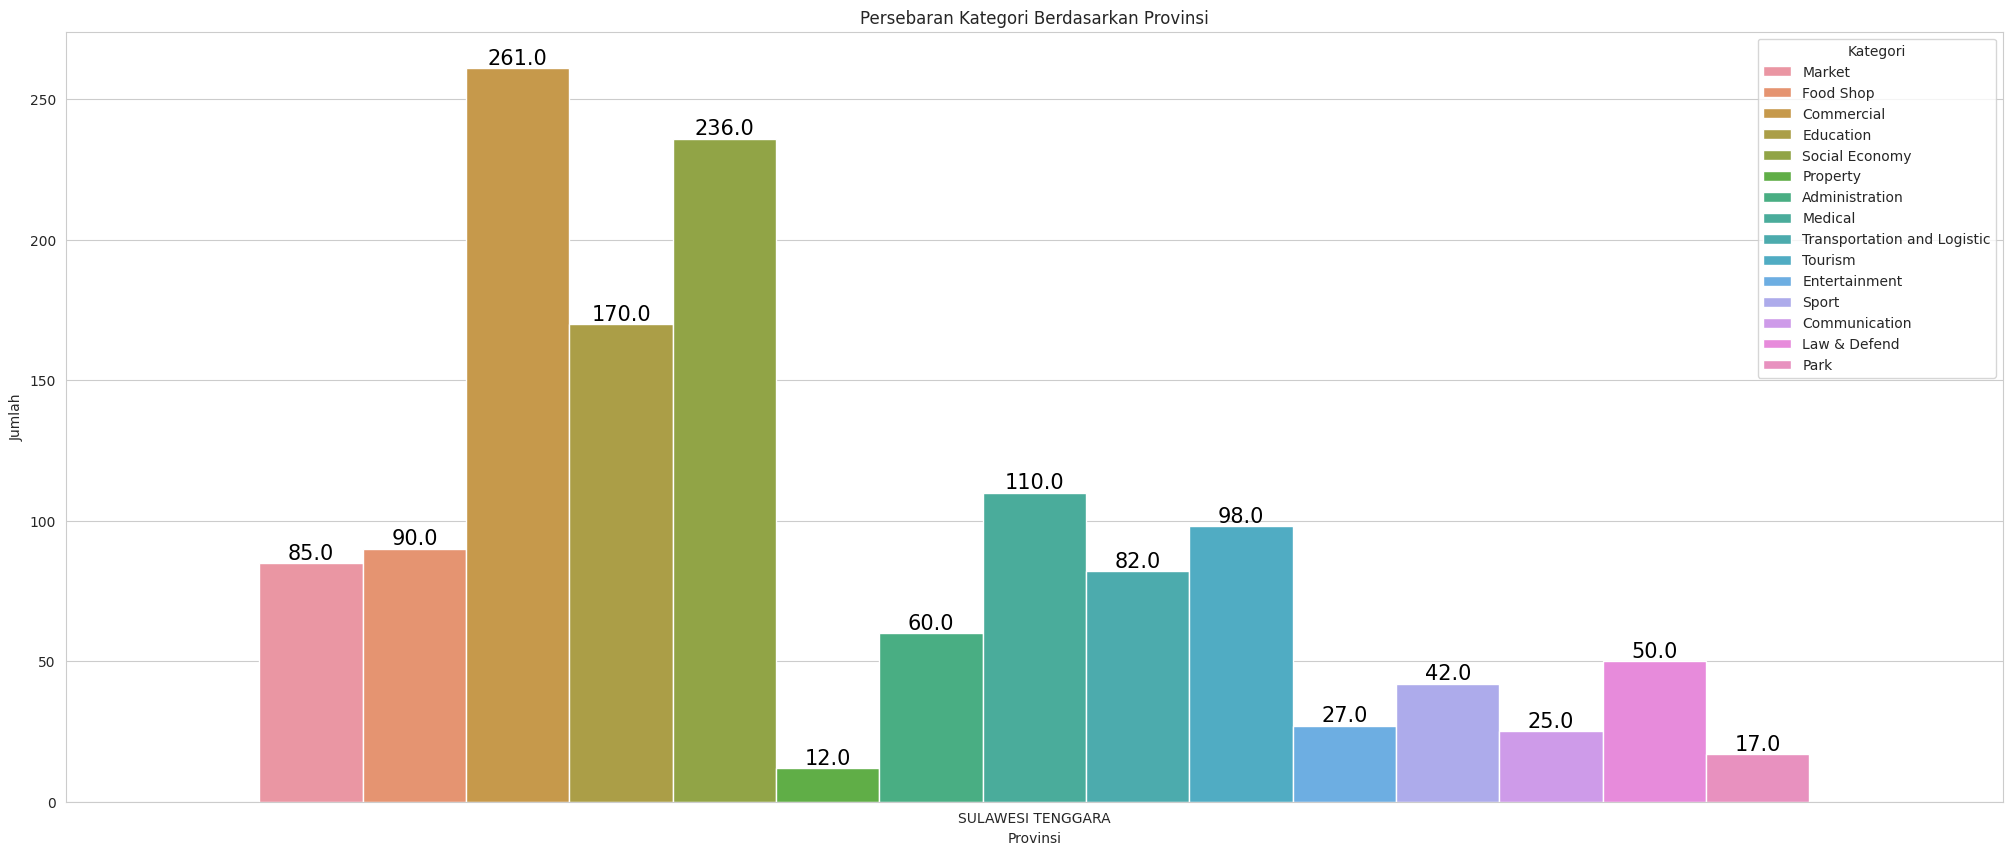

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x=df['Provinsi'], hue='Kategori', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=15, color='black')

plt.title('Persebaran Kategori Berdasarkan Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah')
plt.legend(title='Kategori')
plt.show()

POI yang banyak di Sulawesi Tenggara ialah kategori Commercial, Social Economy, dan Education. Oleh karena itu akan dilakukan analisis dan mencari insight 3 data tersebut.

# 1. Analisis POI Paling Banyak di Sulawesi Tenggara

## A. Commercial

### Analisis Persebaran Commercial berdasarkan Kabupaten Kota

KOTA KENDARI        56
KOTA BAUBAU         31
KOLAKA              28
KONAWE              18
KONAWE SELATAN      16
KOLAKA UTARA        15
MUNA                14
BOMBANA             14
KOLAKA TIMUR        12
KONAWE UTARA        10
BUTON UTARA         10
BUTON TENGAH         9
WAKATOBI             9
BUTON                6
BUTON SELATAN        6
MUNA BARAT           5
KONAWE KEPULAUAN     2
Name: Kabkot, dtype: int64


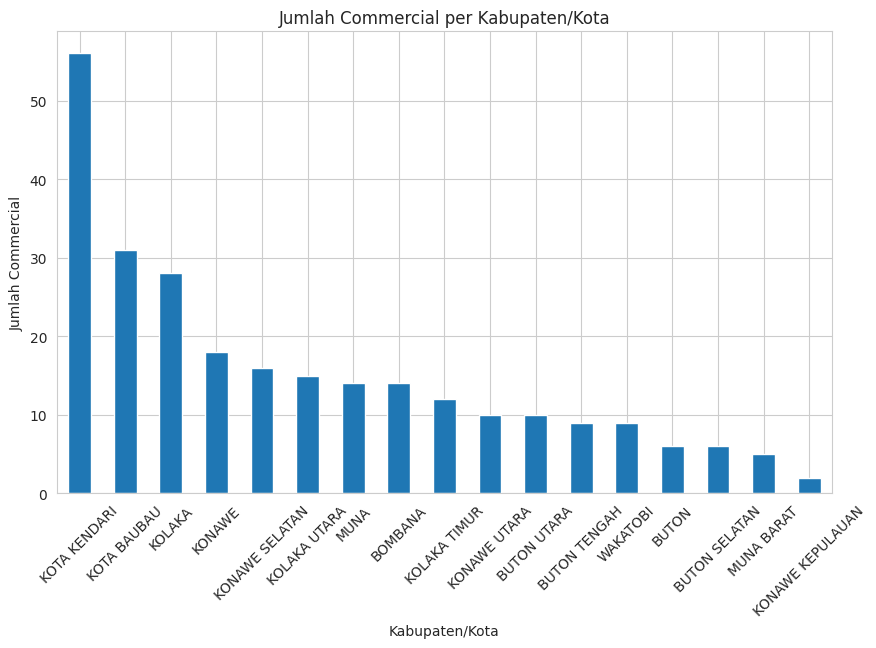

In [ ]:
# Filter data hanya untuk kategori Commercial
df_Commercial = df[df['Kategori'] == 'Commercial']

# Menghitung jumlah Commercial per kabupaten/kota
Commercial_counts = df_Commercial['Kabkot'].value_counts()

# Menampilkan kategori Commercialdengan jumlah terbanyak di setiap kabupaten/kota
print(Commercial_counts)

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
Commercial_counts.plot(kind='bar')
plt.title('Jumlah Commercial per Kabupaten/Kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Commercial')
plt.xticks(rotation=45)
plt.show()


Kota Kendari, Kota Baubau, dan Kolaka merupakan Kabupaten Kota yang banyak terdapat bangunan atau POI commercial.

### Distribusi Sub Kategori berdasarkan Sektor Commercial

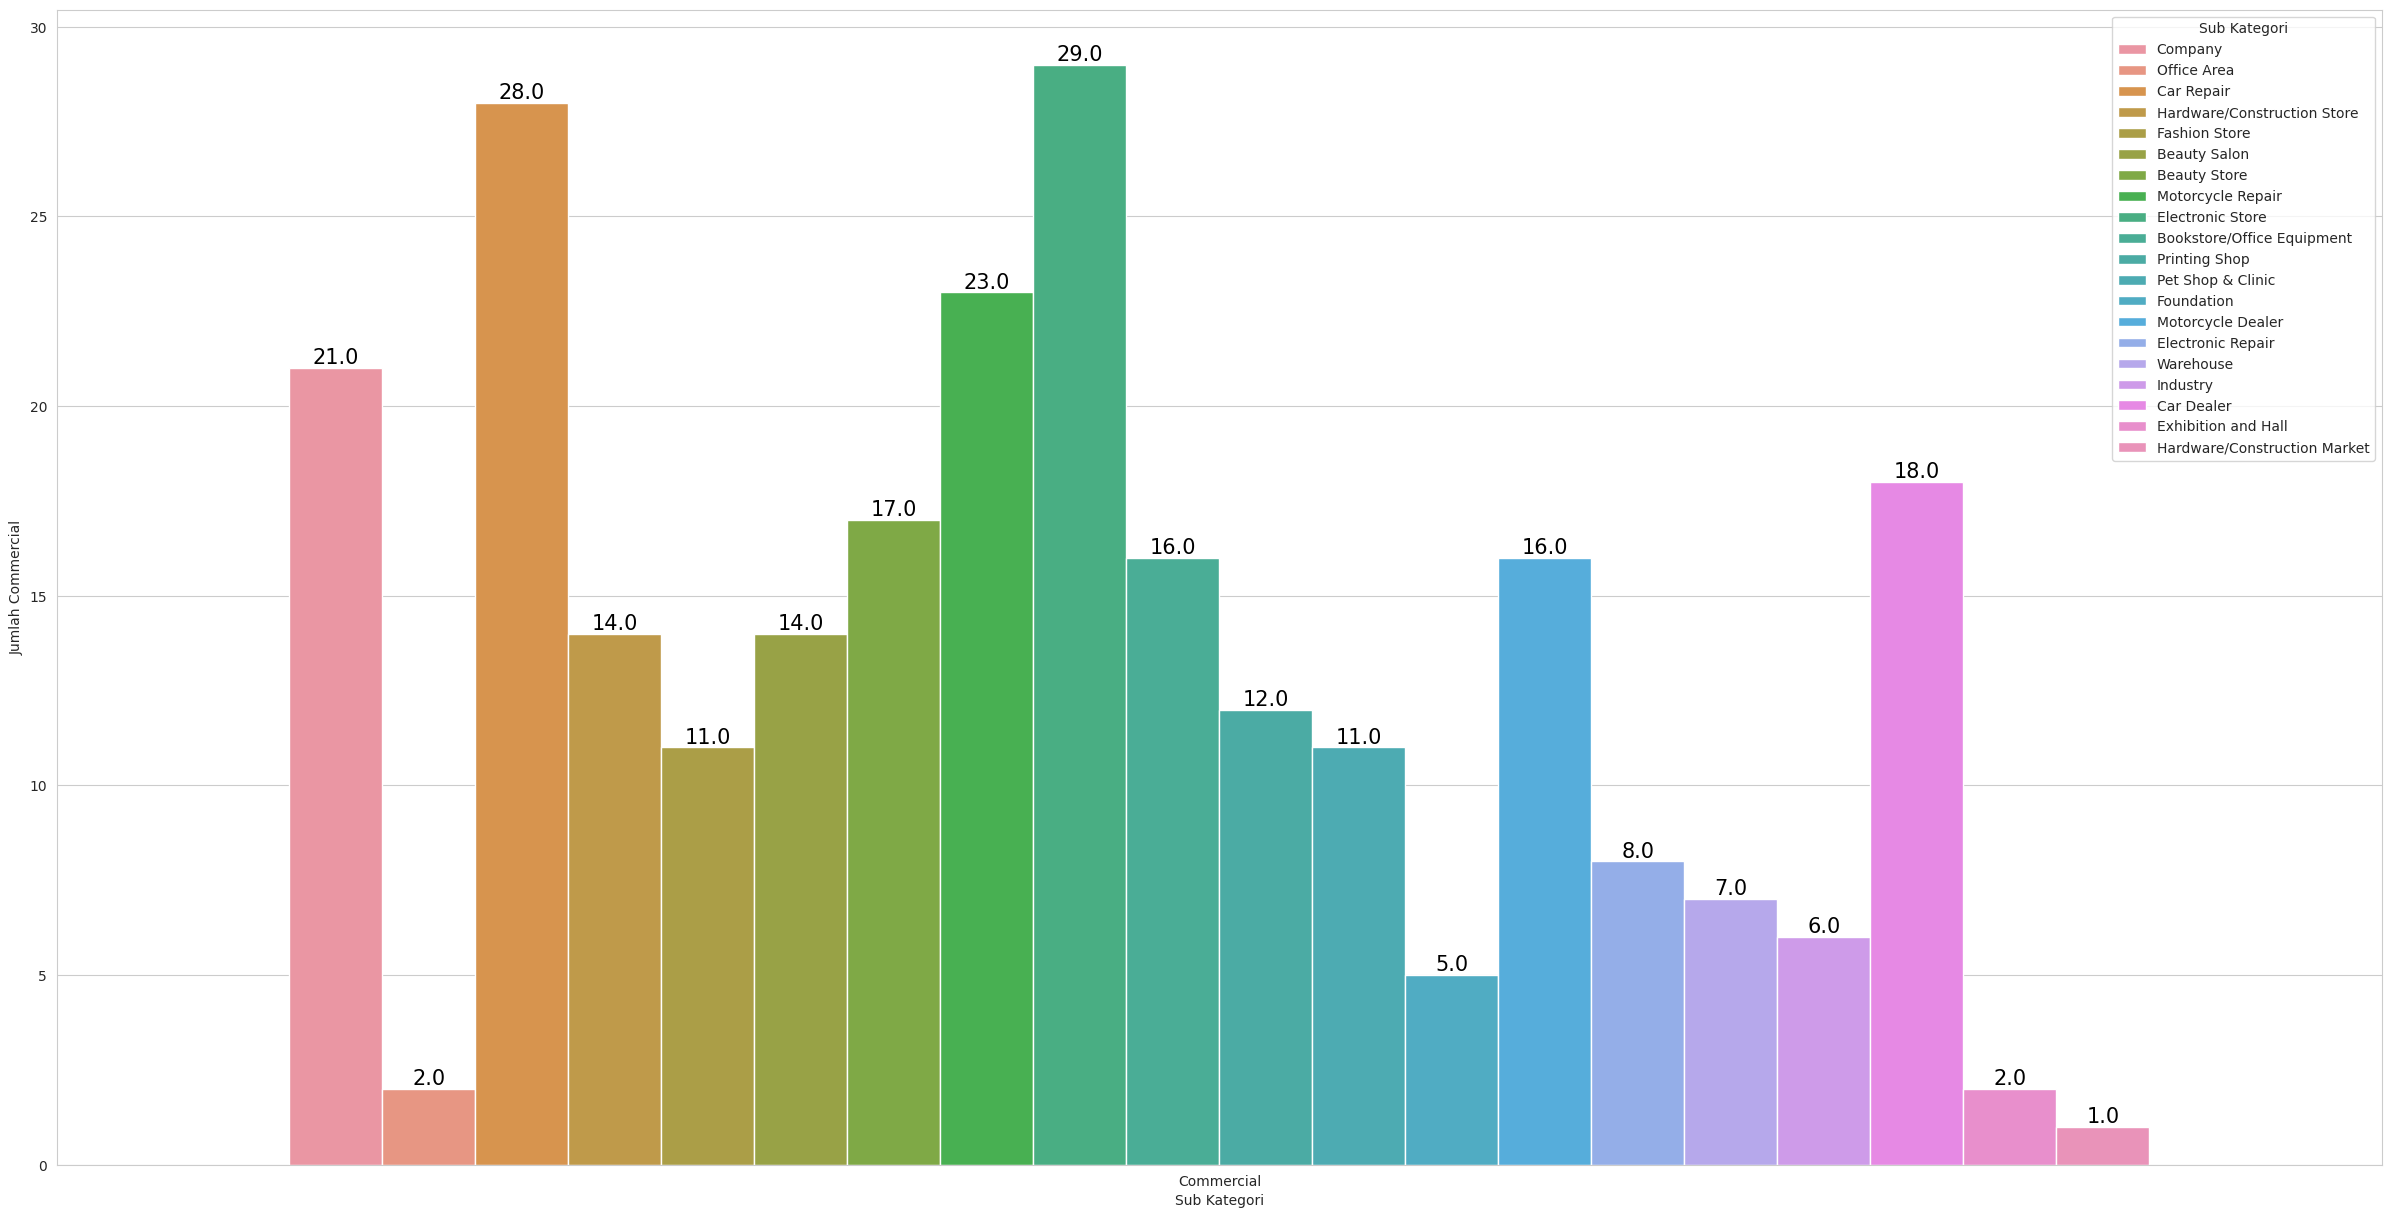

In [ ]:
# Filter data hanya untuk kategori 'Commercial'
df_commercial = df[df['Kategori'] == 'Commercial']

# Mengambil data unik dari kolom "Commercial"
commercial_values = df_commercial['Sub Kategori'].unique()


selected_data = df[df['Kategori'].isin(['Commercial']) & df['Sub Kategori'].isin(commercial_values)]

# Membuat visualisasi bar chart
plt.figure(figsize=(30, 15))
ax = sns.countplot(x='Kategori', hue='Sub Kategori', data=selected_data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=15, color='black')
plt.xlabel('Sub Kategori')
plt.ylabel('Jumlah Commercial')
plt.show()


Dari visualisasi dapat dilihat bahwa sektor commercial yang banyak di Sulawesi Tenggara ada pada Electronic Strore, Motorcycle Repair, Car Repair dan Company. Dari adanya POI ini kita daoat menentukan bisnis yang dapat dikembangkan di Sulawesi Tenggara.

### Persebaran Sub Kategori Commercial di Kota Kendari

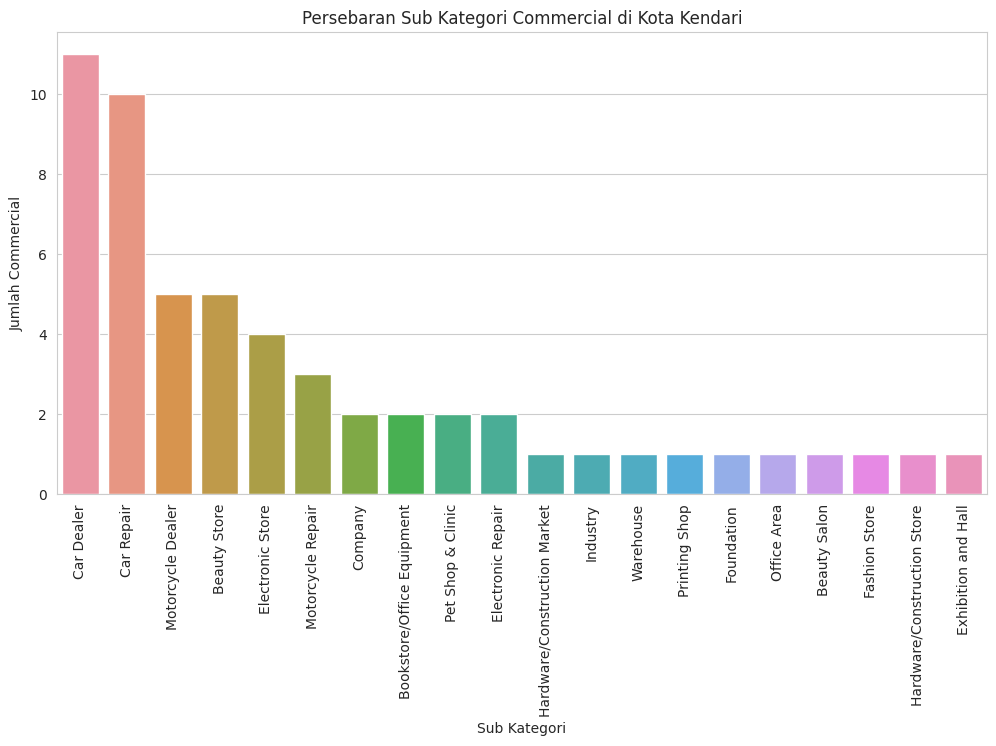

In [ ]:
df_commercial = df[(df['Kategori'] == 'Commercial') & (df['Kabkot'] == 'KOTA KENDARI')]

# Count the occurrences of Sub Kategori within Commercial category in Kota Kendari
commercial_counts = df_commercial['Sub Kategori'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=commercial_counts.index, y=commercial_counts.values)
plt.xlabel('Sub Kategori')
plt.ylabel('Jumlah Commercial')
plt.title('Persebaran Sub Kategori Commercial di Kota Kendari')
plt.xticks(rotation=90)
plt.show()


Sedangkan untuk di Kota Kendari sendiri yang terdapat sektor commercial yang banyak juga didominasi oleh car dealer, car repair, motorcycle dealer.

## B. Social Economy

### Persebaran Sektor Social Economy

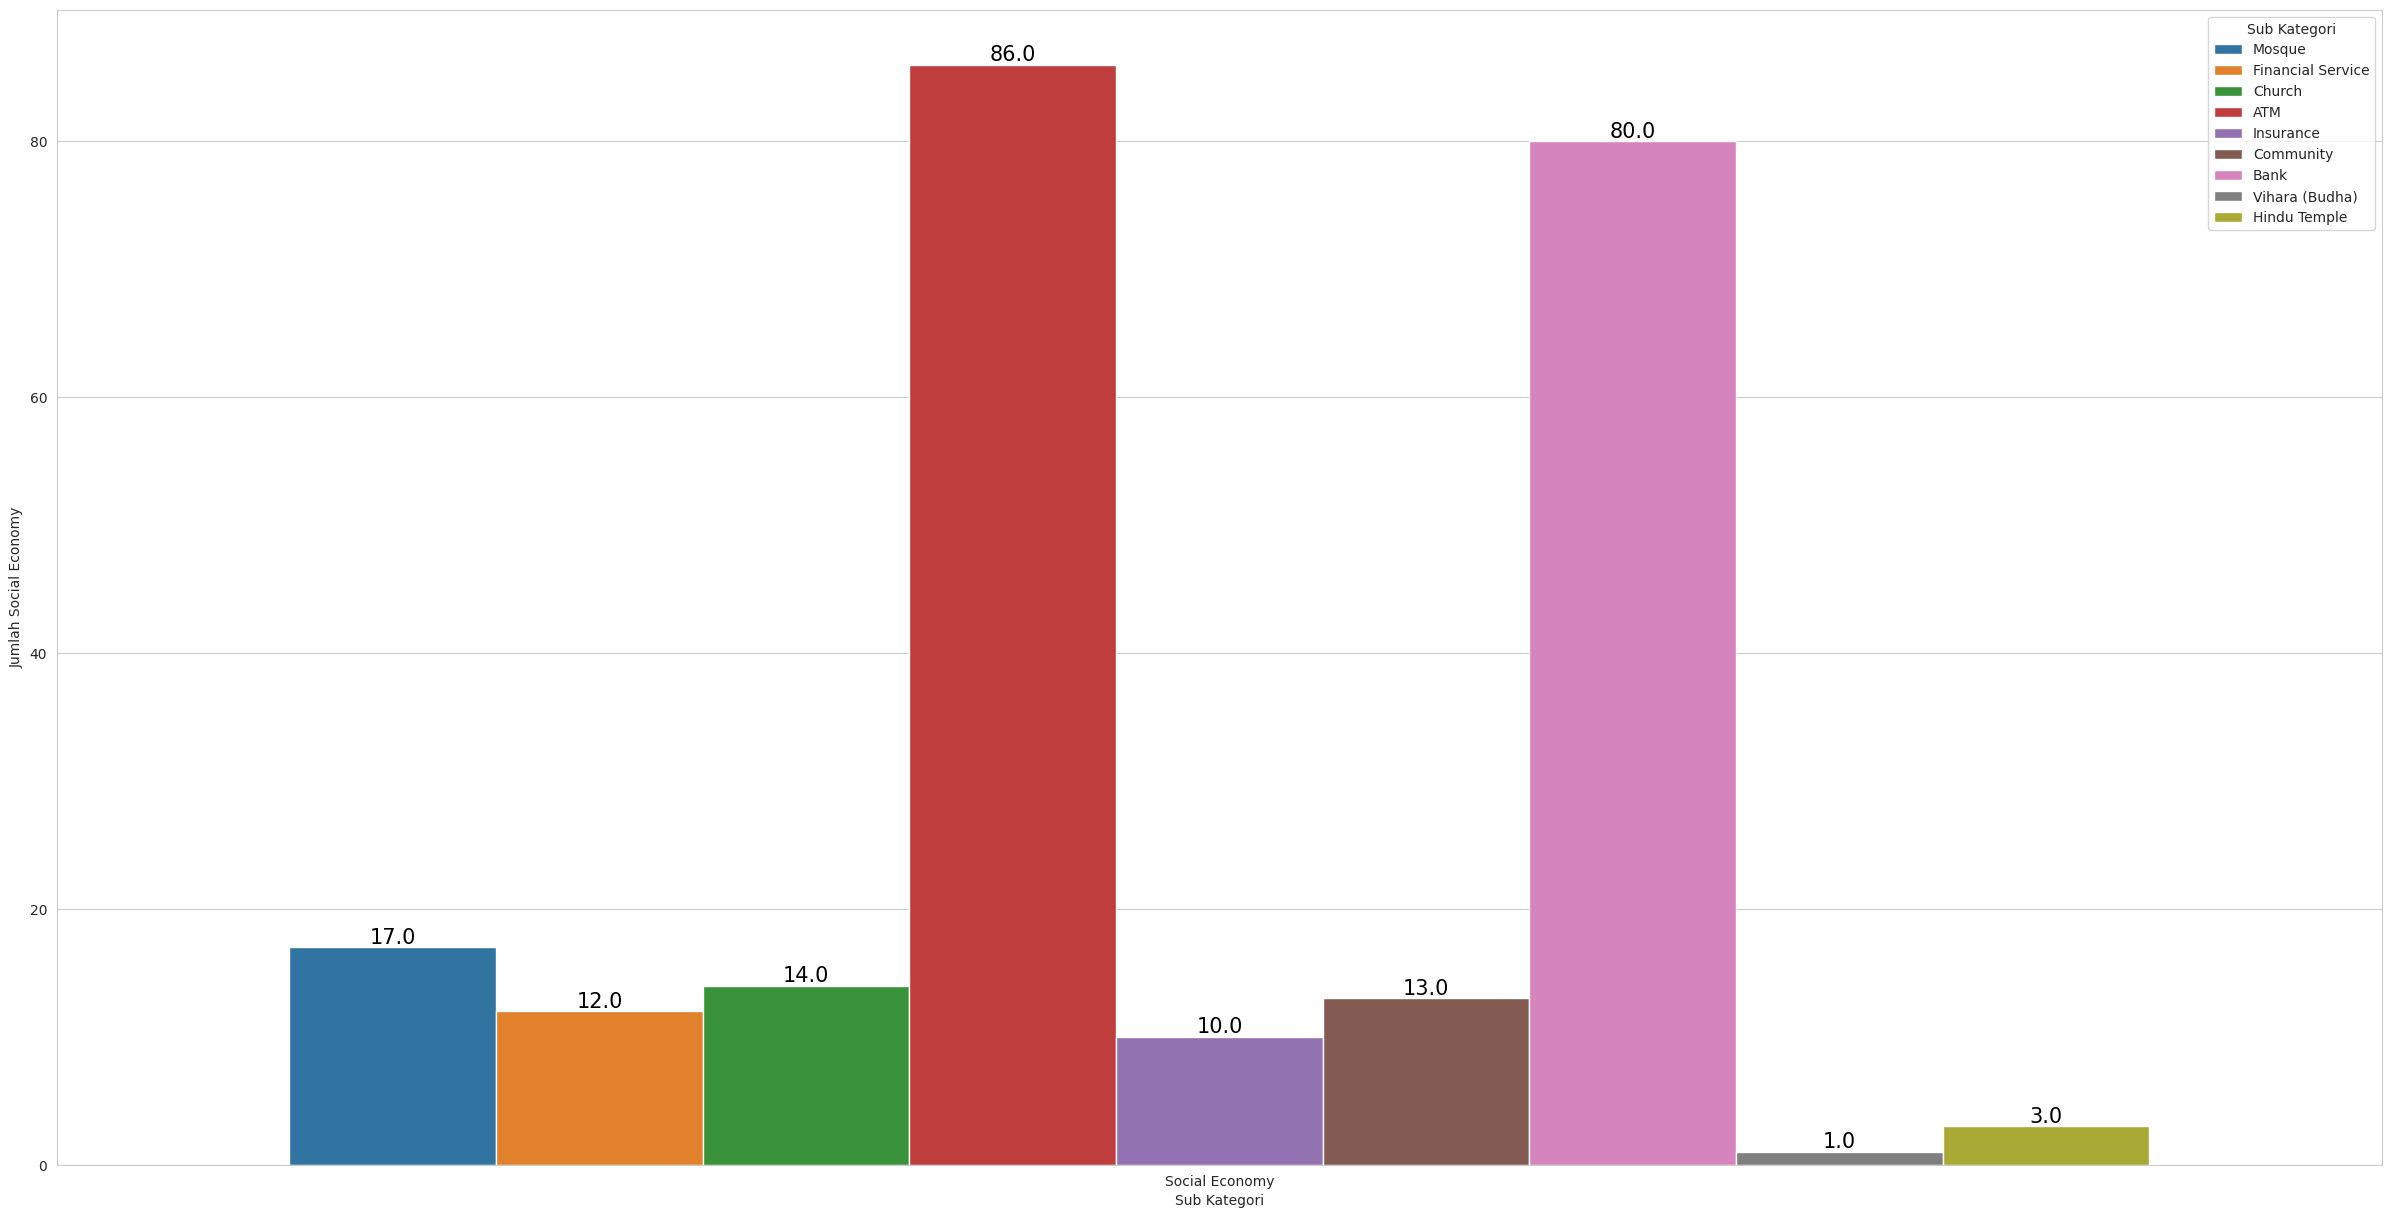

In [ ]:
# Filter data hanya untuk kategori 'Social Economy'
df_SocialEconomy = df[df['Kategori'] == 'Social Economy']

# Mengambil data unik dari kolom "Social Economy"
SocialEconomy_values = df_SocialEconomy['Sub Kategori'].unique()


selected_data = df[df['Kategori'].isin(['Social Economy']) & df['Sub Kategori'].isin(SocialEconomy_values)]

# Membuat visualisasi bar chart
plt.figure(figsize=(30, 15))
ax = sns.countplot(x='Kategori', hue='Sub Kategori', data=selected_data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=15, color='black')
plt.xlabel('Sub Kategori')
plt.ylabel('Jumlah Social Economy')
plt.show()


Pada Sektor Social Economy yang mendominasi adalah sektor perbankan beserta keberadaan ATMnya.

### Distribusi dan Persebaran Ktegori Social Economy di Kabupaten Kota

KOTA KENDARI        50
KOLAKA              28
KOTA BAUBAU         24
KONAWE              18
BOMBANA             14
KOLAKA UTARA        14
KONAWE SELATAN      14
MUNA                13
KOLAKA TIMUR        10
BUTON               10
KONAWE UTARA         9
WAKATOBI             7
BUTON UTARA          7
BUTON TENGAH         6
MUNA BARAT           5
KONAWE KEPULAUAN     5
BUTON SELATAN        2
Name: Kabkot, dtype: int64


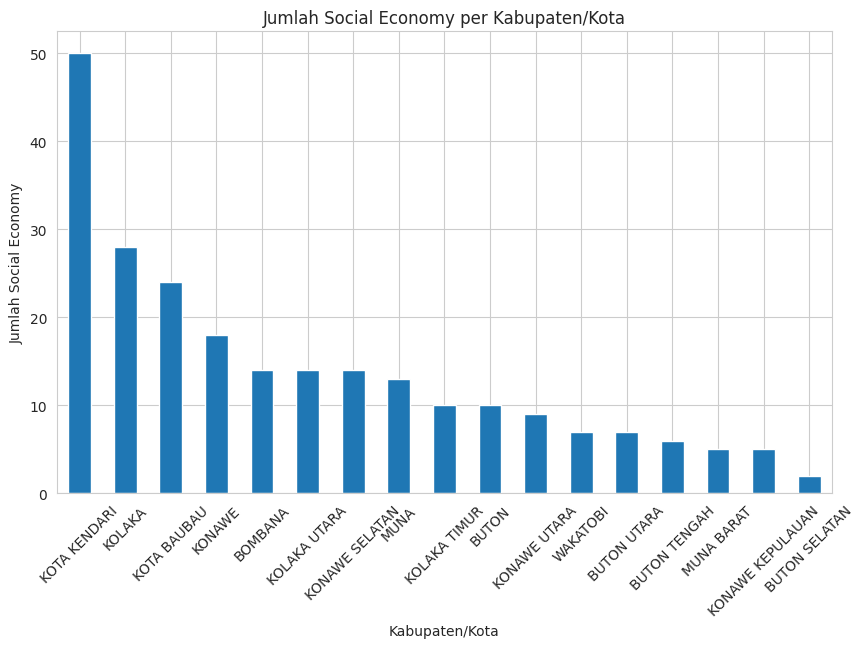

In [ ]:
# Filter data hanya untuk kategori
df_Sosec = df[df['Kategori'] == 'Social Economy']

# Menghitung jumlah Social Economy dper kabupaten/kota
Sosec_counts = df_Sosec ['Kabkot'].value_counts()

# Menampilkan kategori Social Economy dengan jumlah terbanyak di setiap kabupaten/kota
print(Sosec_counts)

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
Sosec_counts.plot(kind='bar')
plt.title('Jumlah Social Economy per Kabupaten/Kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah Social Economy')
plt.xticks(rotation=45)
plt.show()


Kota Kendari menjadi Kabupaten Kota yang banyak terdapat sector Social Economy.

### Distribusi Bank

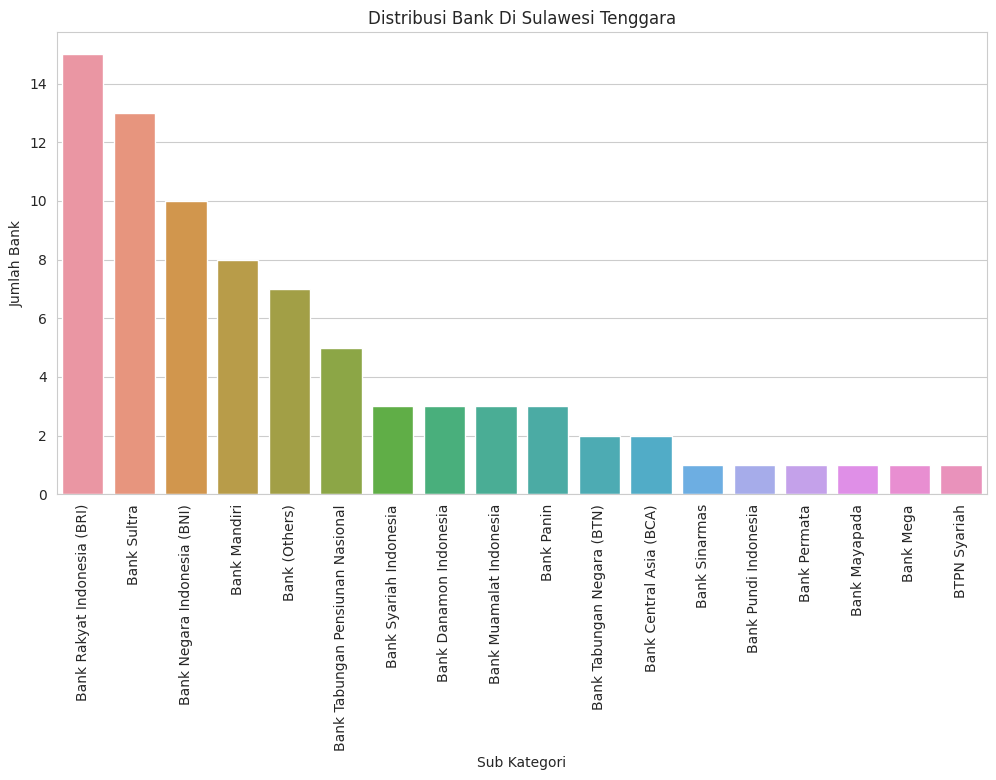

In [ ]:
social_economy_atm = df[(df['Kategori'] == 'Social Economy') & (df['Sub Kategori'] == 'Bank')]

social_economy_atm_counts  = social_economy_atm['Brand'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=social_economy_atm_counts.index, y=social_economy_atm_counts.values)
plt.xlabel('Sub Kategori')
plt.ylabel('Jumlah Bank')
plt.title('Distribusi Bank Di Sulawesi Tenggara')
plt.xticks(rotation=90)
plt.show()


Berdasarkan Jumlah Bank, Keberadaan Junlah Bank yang paling banyak ada Bank BRI, Bank Sultra, dan Bank BNI.

### Distribusi ATM

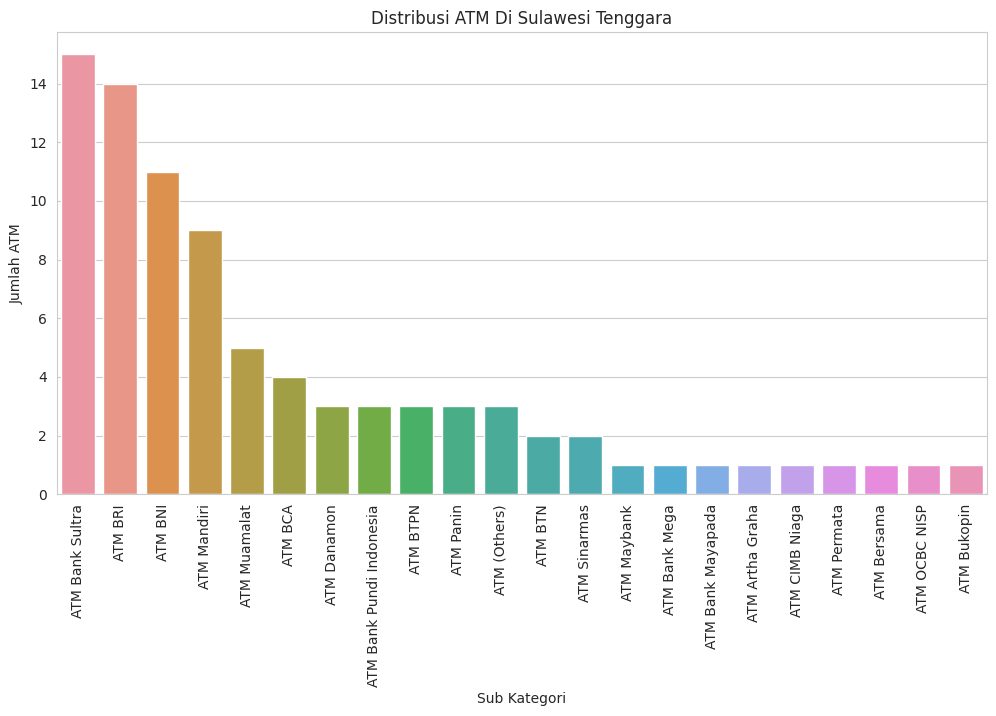

In [ ]:
social_economy_atm = df[(df['Kategori'] == 'Social Economy') & (df['Sub Kategori'] == 'ATM')]

social_economy_atm_counts  = social_economy_atm['Brand'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=social_economy_atm_counts.index, y=social_economy_atm_counts.values)
plt.xlabel('Sub Kategori')
plt.ylabel('Jumlah ATM')
plt.title('Distribusi ATM Di Sulawesi Tenggara')
plt.xticks(rotation=90)
plt.show()


Berdasarkan Jumlah ATM, Keberadaan Junlah Bank yang paling banyak ada Bank BRI, Bank Sultra, dan Bank BNI.